In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Starting from the dataset 

In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/Social Network Analysis/all_reviews_raw.csv")

In [ ]:
data.shape

(591570, 16)

In [ ]:
data.rating.value_counts()

5.0    228092
4.0    186232
3.0     92256
2.0     41097
1.0     28700
Name: rating, dtype: int64

In [ ]:
uni_user = data['user_url'].unique()
len(uni_user)
#number of unique users

216514

In [ ]:
num_book = data['book_title'].unique()
len(num_book)
#number of unique books

3155

In [ ]:
data.head()

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves,len_text,gender,language
0,7507825-at-home,7507825-at-home,At Home: A Short History of Private Life,https://www.goodreads.com/review/show/126924852,126924852,2010-10-19,4.0,Sonja,/user/show/4436063-sonja,I came across a review that dismissed Bill Bry...,343,default,[],5373,female,en
1,7507825-at-home,7507825-at-home,At Home: A Short History of Private Life,https://www.goodreads.com/review/show/152923814,152923814,2011-03-08,5.0,Anita,/user/show/999171-anita,If Bill Bryson and Sarah Vowell wrote all the ...,146,default,['non-fiction'],1236,female,en
2,7507825-at-home,7507825-at-home,At Home: A Short History of Private Life,https://www.goodreads.com/review/show/2177542316,2177542316,2017-11-13,5.0,Miranda Reads,/user/show/71848701-miranda-reads,\n\nLooking for a new book but don't want to c...,127,default,['audiobook'],2162,female,en
3,7507825-at-home,7507825-at-home,At Home: A Short History of Private Life,https://www.goodreads.com/review/show/1610026093,1610026093,2016-04-14,3.0,Roy Lotz,/user/show/14046996-roy-lotz,Reading this book is rather like having a triv...,81,default,['one-damn-thing-after-another'],164,male,en
4,7507825-at-home,7507825-at-home,At Home: A Short History of Private Life,https://www.goodreads.com/review/show/106555177,106555177,2010-06-10,3.0,Erin,/user/show/2050376-erin,"Let me preface this review by saying that, yes...",80,default,['history-and-biography'],1328,female,en


Using this dataset, we created a dictionary where each unique user is associated with his or her read books (writing a review means have read that book)

In [ ]:
#intialize empty dictionary
dizio=dict()
for elem in uni_user:
  dizio[elem]=set()

In [ ]:
#filling with his or her read books
for _,row in data.iterrows():
  dizio[row['user_url']].add(row['book_id_title'])

In [ ]:
len(dizio)

216514

# distribution of books

In order to show the distribution of books by users, we generated a specific dataframe

In [ ]:
df_books = pd.DataFrame(list(dizio.items()), columns=['User', "Books"])

In [ ]:
df_books["NumOfBooks"] = df_books["Books"].apply(lambda x: len(x))
#number of books per user

In [ ]:
df_books

,User,Books,NumOfBooks
0,/user/show/4436063-sonja,{7507825-at-home},1
1,/user/show/999171-anita,"{818811.Escape, 10996342-the-art-of-fielding, ...",22
2,/user/show/71848701-miranda-reads,"{18478222-twelve-years-a-slave, 23453112-moder...",238
3,/user/show/14046996-roy-lotz,"{1540.The_Oedipus_Cycle, 23453112-modern-roman...",221
4,/user/show/2050376-erin,"{1540.The_Oedipus_Cycle, 4806.Longitude, 75078...",6
...,...,...,...
216509,/user/show/129899816-jess-ogan,{92308.The_Importance_of_Being_Earnest_and_Oth...,1
216510,/user/show/136535896-charlotte-r,{92308.The_Importance_of_Being_Earnest_and_Oth...,1
216511,/user/show/29501510-alice,{92308.The_Importance_of_Being_Earnest_and_Oth...,1
216512,/user/show/38548655-julia-lara,{92308.The_Importance_of_Being_Earnest_and_Oth...,1


In [ ]:
df_books["NumOfBooks"].max()

432

(0.0, 50.0)

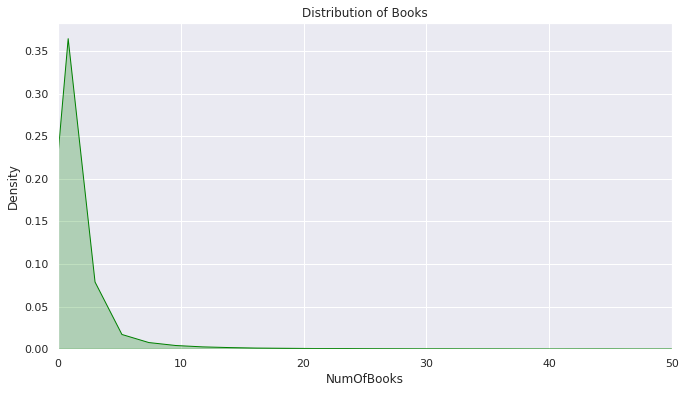

In [ ]:
sns.set()
fig, ax = plt.subplots(figsize=(11, 6))
sns.kdeplot(data=df_books, x="NumOfBooks", shade = True, color = 'Green')

ax.set_title('Distribution of Books')
ax.set_xlim([0,50])

(0.0, 10.0)

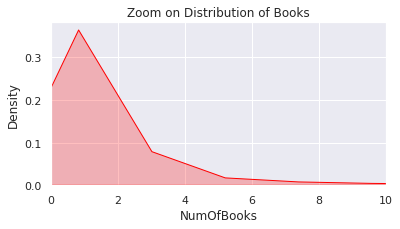

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.kdeplot(data=df_books, x="NumOfBooks",  shade = True, color = 'Red')

ax.set_title('Zoom on Distribution of Books')
ax.set_xlim([0,10])

# distribution of rating per user

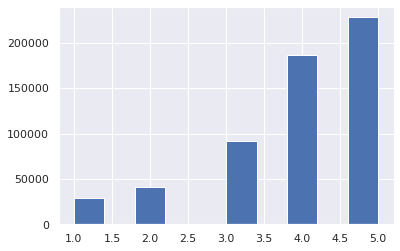

In [ ]:
plt.figure()
data['rating'].hist()
plt.show()

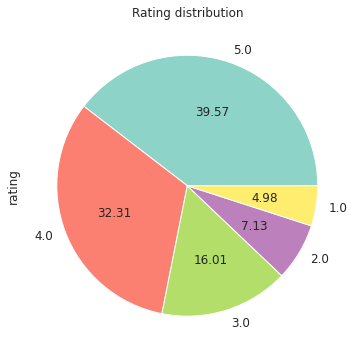

In [ ]:
counts = data["rating"].value_counts()
counts.plot(kind="pie", labels=counts.index.tolist(), autopct='%.2f',
                fontsize=12, figsize=(6, 6), title="Rating distribution", colormap="Set3")
plt.show()

# distribution of gender

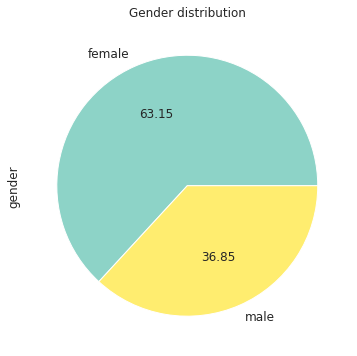

In [ ]:
counts = data["gender"].value_counts()
counts.plot(kind="pie",
            labels=counts.index.tolist(), autopct='%.2f',
                fontsize=12, figsize=(6, 6), title="Gender distribution", colormap="Set3")
plt.show()

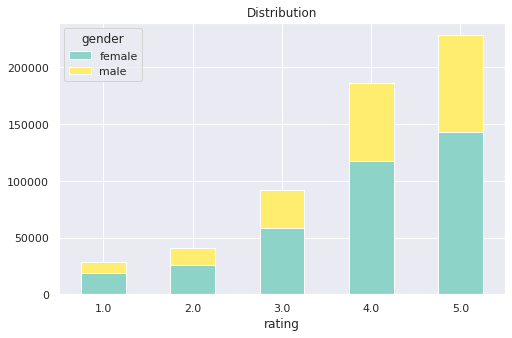

In [ ]:
#gender by rating
pd.crosstab(index = data["rating"],columns = data["gender"]).plot(kind='bar',
                figsize=(8, 5),rot=0,stacked=True,title="Distribution", colormap="Set3")
plt.show()

# creating links

So we decided to remove all the people that have read less than 4 books.

In [ ]:
dict_2=dizio.copy()
for elem in dizio:
  if len(dizio[elem])<4:
    del dict_2[elem]
len(dict_2)
#number of users that have read at least 4 books

25009

In [ ]:
#funzione per contare gli edges
def morte(i):
  edges=0
  link=list(dict_2.keys())
  users=list(dict_2.keys())
  for user1 in link:
    users.remove(user1)
    for user2 in users:
      if len(dict_2[user1]&dict_2[user2])>i:
        edges+=1
  return edges

In [ ]:
!pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 232 kB 5.2 MB/s 
     |████████████████████████████████| 51 kB 4.3 MB/s 


In [ ]:
#conto edges al variare di common books
from rich.progress import track
lista_della_morte=[]
for i in track(range(8), 'ci sto provando...'):
  lista_della_morte.append(morte(i))

Output()

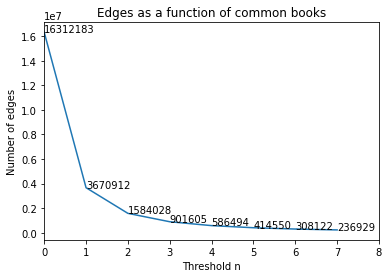

In [ ]:
import numpy
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(0,8)
plt.plot(range(8),lista_della_morte)
for i,j in zip(range(8),lista_della_morte):
    ax.annotate(str(j),xy=(i,j))

  
plt.xlabel('Threshold n')
plt.ylabel('Number of edges')
  
plt.title('Edges as a function of common books')
plt.show()

In [ ]:
#creating new empty dictionary to associate users that have read same books
link=dict()
for user in dict_2:
  link[user]=dict()

In [ ]:
users=list(link.keys())
for user1 in link:
  users.remove(user1)
  for user2 in users:
    if len(dict_2[user1]&dict_2[user2])>0:
      link[user1][user2]=len(dict_2[user1]&dict_2[user2])
#linking users that have read at least a common book

In [ ]:
df_link = pd.DataFrame(list(link.items()), columns=['User', "Link"])
df_link.head()

,User,Link
0,/user/show/999171-anita,"{'/user/show/71848701-miranda-reads': 2, '/use..."
1,/user/show/71848701-miranda-reads,"{'/user/show/14046996-roy-lotz': 13, '/user/sh..."
2,/user/show/14046996-roy-lotz,"{'/user/show/2050376-erin': 2, '/user/show/279..."
3,/user/show/2050376-erin,"{'/user/show/279256-diane': 1, '/user/show/200..."
4,/user/show/279256-diane,"{'/user/show/200881-william-ramsay': 1, '/user..."


In [ ]:
list_values = []
df_link["Link"].apply(lambda x: list_values.extend(list(x.values())))
len(list_values)

16312183

In [ ]:
list_of_books = pd.Series(list_values)
list_of_books.value_counts()

1      12641271
2       2086884
3        682423
4        315111
5        171944
         ...   
141           1
122           1
145           1
146           1
131           1
Length: 147, dtype: int64

(0.0, 10.0)

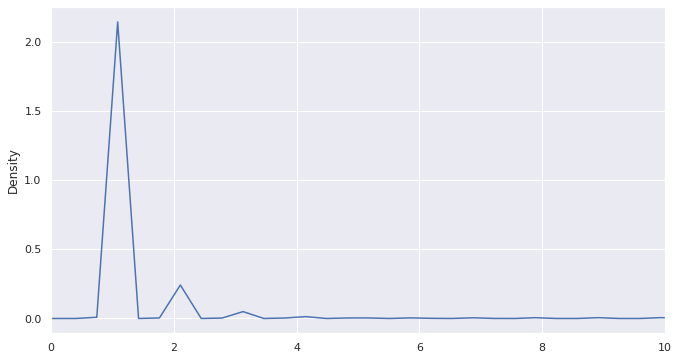

In [ ]:
fig, ax = plt.subplots(figsize=(11,6))
list_of_books.plot(kind='density')
ax.set_xlim(0,10)

So we decide to keep only users that have at least two books in common

In [ ]:
link=dict()
for user in dict_2:
  link[user]=dict()

In [ ]:
users=list(link.keys())
for user1 in link:
  users.remove(user1)
  for user2 in users:
    if len(dict_2[user1]&dict_2[user2])>1:
      link[user1][user2]=len(dict_2[user1]&dict_2[user2])
#linking users that have read at least 2 common books

Here we dropped users that have empty dictionary (no links)

In [ ]:
num=0
lista=[]
for user in link:
    if len(link[user])==0:
        num+=1
        lista.append(user)
print(num)

4991


In [ ]:
for user in lista:
    if len(link[user])==0:
      del link[user]
len(link)
#this is the final number of nodes

20018

In [ ]:
users=set(lista)
for user1 in link:
  new_dict = dict()
  for user2 in link[user1]:
    if user2 not in users:
      new_dict[user2] = link[user1][user2]
  link[user1] = new_dict

In [ ]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(1, link.items())
n_items

[('/user/show/999171-anita',
  {'/user/show/101007-molly': 2,
   '/user/show/102271-cynthia-paschen': 2,
   '/user/show/1026591-christian-mckay': 4,
   '/user/show/10312986-lyn-elliott': 2,
   '/user/show/1041137-kristen': 2,
   '/user/show/104823-kate': 2,
   '/user/show/1060805-marie': 2,
   '/user/show/106692-cheri': 3,
   '/user/show/10684626-lynn': 2,
   '/user/show/10770371-dan': 2,
   '/user/show/1085121-stephanie-eff-your-feelings': 2,
   '/user/show/10978428-jim': 2,
   '/user/show/1108123-bettie': 3,
   '/user/show/1125315-colleen': 2,
   '/user/show/1127480-lisa-butterworth': 2,
   '/user/show/1132408-meg---a-bookish-affair': 2,
   '/user/show/1142366-hans': 2,
   '/user/show/1159787-valerie': 4,
   '/user/show/1166663-carol': 3,
   '/user/show/1176575-walt': 2,
   '/user/show/1177534-michael': 2,
   '/user/show/11820811-camelia-rose': 2,
   '/user/show/1182891-sue': 2,
   '/user/show/11874992-rex-fuller': 2,
   '/user/show/11889829-suzanne': 2,
   '/user/show/11951948-paul'

# Creating Gephi CSV

In [ ]:
import numpy as np
lst=[]
i=0
for elem in link:
    lst.append([i,elem])
    i+=1
df = pd.DataFrame(lst, columns = ['Id', 'Label'])
df.to_csv('/content/drive/Shareddrives/Social Network Analysis/nodes.csv', index=False)
df.head()

,Id,Label
0,0,/user/show/999171-anita
1,1,/user/show/71848701-miranda-reads
2,2,/user/show/14046996-roy-lotz
3,3,/user/show/2050376-erin
4,4,/user/show/279256-diane


In [ ]:
df.shape

(20018, 2)

In [ ]:
lst=[]
for user in link:
  for elem in list(link[user].keys()):
    lst.append([user,elem,'Undirected',(link[user][elem])/len(num_book)]) #len(num_book)=3155, serve per pesare
df1 = pd.DataFrame(lst, columns = ['Source','Target','Type','Weight'])
df1.head()

,Source,Target,Type,Weight
0,/user/show/999171-anita,/user/show/71848701-miranda-reads,Undirected,0.000634
1,/user/show/999171-anita,/user/show/279256-diane,Undirected,0.001268
2,/user/show/999171-anita,/user/show/175635-trevor,Undirected,0.000951
3,/user/show/999171-anita,/user/show/1237196-petra-him-i-don-t-like-you-...,Undirected,0.001268
4,/user/show/999171-anita,/user/show/6257531-caroline,Undirected,0.000634


In [ ]:
df1.shape

(3526979, 4)

In [ ]:
df1['Source'] = df1['Source'].map(df.set_index('Label')['Id'])
df1['Target'] = df1['Target'].map(df.set_index('Label')['Id'])
df1.head()
#siano ringraziati gli indiani per sti replace rapidi

,Source,Target,Type,Weight
0,0,1,Undirected,0.000634
1,0,4,Undirected,0.001268
2,0,6,Undirected,0.000951
3,0,7,Undirected,0.001268
4,0,8,Undirected,0.000634


In [ ]:
df1.to_csv('/content/drive/Shareddrives/Social Network Analysis/edges.csv', index=False)